##  How to run the code

This notebook runs the whole code from plotting the inputs, graph creation, graph representation, training and validation

### Instalation

Follow instructions on README
```
virtualenv pyenv  --python=3.11
source <name_of_venv>/bin/activate
pip install .
```

 ### Plot inputs

 The code is stored under ``plotter`` and it is self-consistent. It takes a root file generated with the Dumper and plots a given histogram. Input files must be indicated in the ``dataset.py`` and the plots to be drawn in the ``plots.py``, the code will then be executed as follows: 

```
python plotter.py --pdir myoutputdir
```

### Generate Graphs

Only 3-neighbours are connected
Loading data from ../data/Dumper_NTuples_v240725/Dumper_l1omtf_40files.root:simOmtfPhase2Digis/OMTFHitsTree


/Users/folgueras/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Graphs created and stored
Drawing example graphs into  graph_example_ALLlayers.png


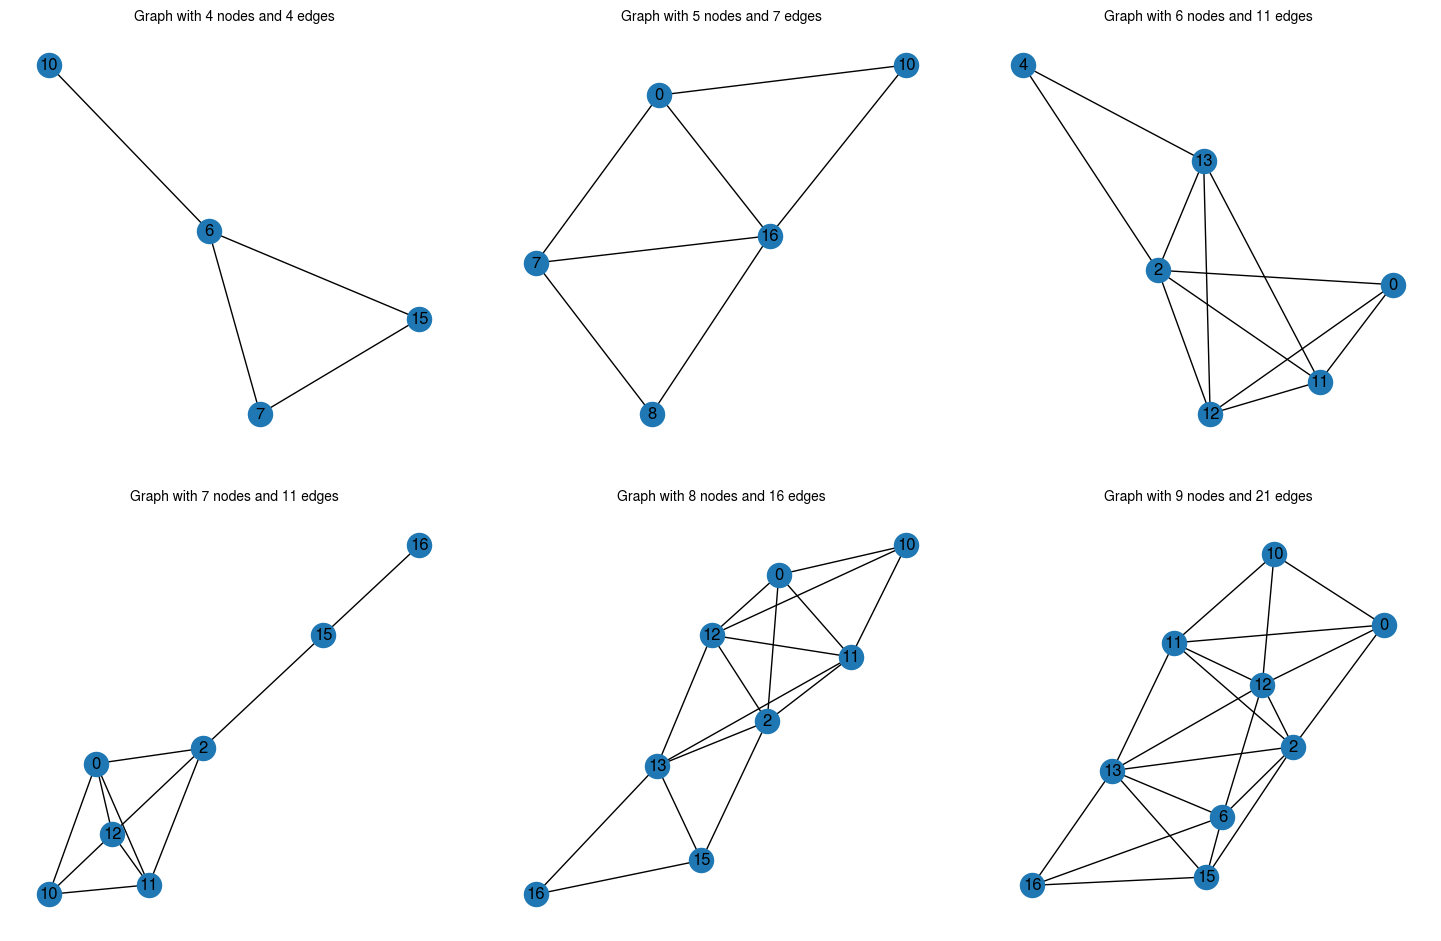

Verifying graphs, checking connectivity
Graph with 6 nodes and 6 edges is not connected
Nodo 0: x = [1.0005, 2.4830217491705993, 431.133, 0, 3], y = [-6.6778764724731445]
Nodo 10: x = [0.957, 2.261946710584651, 413.675, 10, 5], y = [-6.6778764724731445]
Nodo 11: x = [1.06575, 2.2782364502699313, 448.675, 11, 5], y = [-6.6778764724731445]
Nodo 6: x = [1.076625, 2.3049981654671776, 962.0610847398981, 6, 9], y = [-6.6778764724731445]
Nodo 16: x = [1.076625, 2.2991804012938633, 1101.4902274558253, 16, 5], y = [-6.6778764724731445]
Nodo 7: x = [1.0875, 2.3073252711365035, 1145.6498314211042, 7, 9], y = [-6.6778764724731445]
Drawing graph into  unconnected_graph_6n_6e.png


/Users/folgueras/cernbox/L1T/INTREPID/emeleTrigger/tools/training/GraphCreationModel.py:296: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


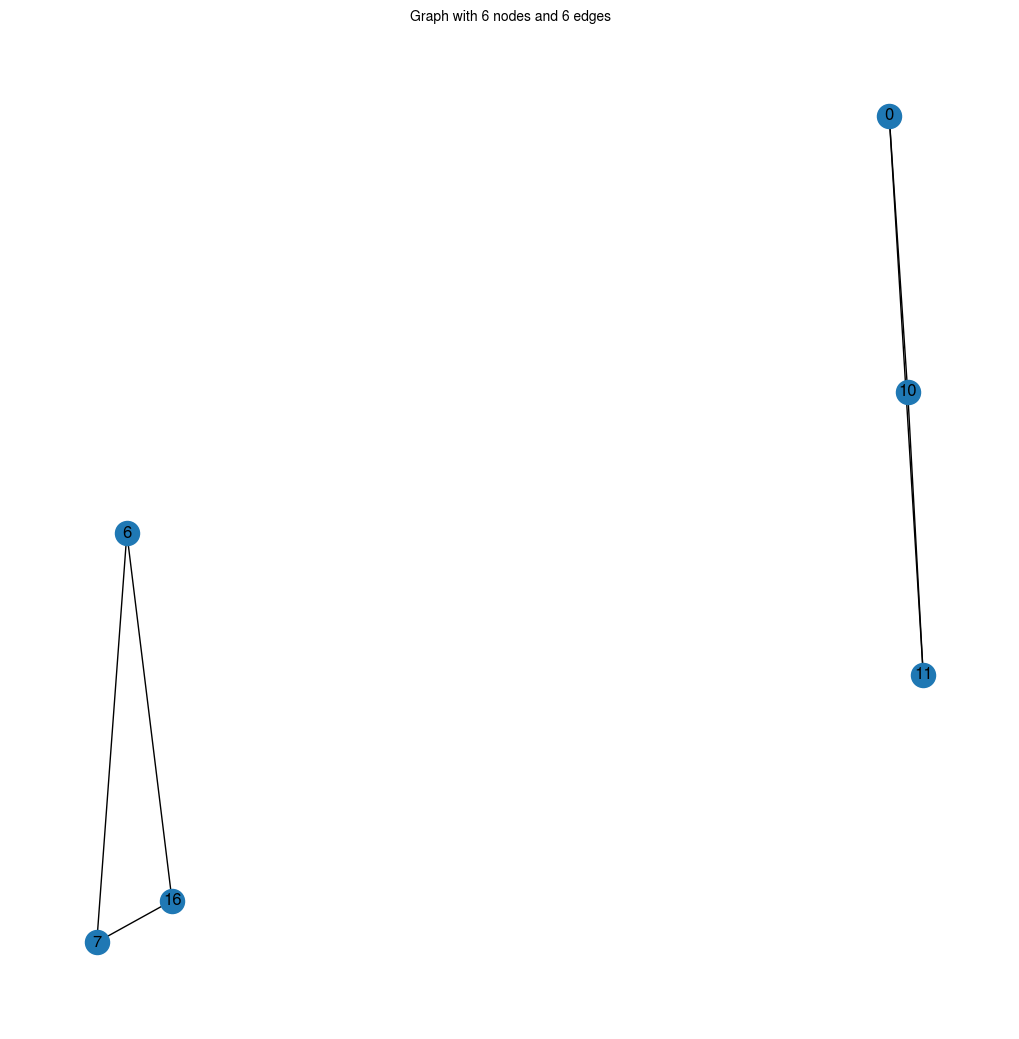

RuntimeError: [enforce fail at inline_container.cc:462] . invalid file name: ../data/Graphs_v240725/l1omtf_40files/

In [5]:
from tools.training.GraphCreationModel import GraphCreationModel

datapath = "../data/Dumper_NTuples_v240725/Dumper_l1omtf_40files.root:simOmtfPhase2Digis/OMTFHitsTree"
savepath = "../data/Graphs_v240725/l1omtf_40files/"

graphs = GraphCreationModel(datapath, savepath, '3')  #for three neighbours
graphs.set_muon_vars(["muonQPt"])  #for muonQPt or muonPt or muonQOverPt 
graphs.load_data()
graphs.convert_to_graph()

graphs.draw_example_graphs("graph_example_ALLlayers.png")
graphs.verifyGraphs()

graphs.saveTorchDataset()

###  Now train with those graphs:

In [ ]:
import matplotlib.pyplot as plt

from TrainModelFromGraph import TrainModelFromGraph

# Input variables and config
InputFolder = "../data/Graphs_v240725/l1omtf_40files/" #/eos/cms/store/user/folguera/L1TMuon/INTREPID/Graphs_v240725_241113/"
OutputFolder = "../data/Model_v240725_Bsize64_lr5e-4_NOnormNodes_muonOverPt_3neight_GAT_241113/"


# Instantiate the network
trainer = TrainModelFromGraph(graph_path=InputFolder,out_path=OutputFolder,num_files=5, epochs=100,graph_name="vix_graph_6Nov_3")

trainer.load_data()
trainer.plot_graph_features(trainer.train_loader)
trainer.initialize_model()


In [ ]:
trainer.Training_loop()
